In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [11]:
df_agg = df.groupby(df.Day.dt.year).aggregate('mean')

In [13]:
df_agg[df_agg.t == df_agg.t.min()] # минимальная

,t
Day,
2012,6.980822


In [14]:
df_agg[df_agg.t == df_agg.t.max()] # максимальная

,t
Day,
2015,9.079452


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [46]:
t_df = df[(df.Day.dt.month == 1) & (df.t >=0)].groupby(df.Day.dt.year).aggregate('count')
t_df[t_df.Day == t_df.Day.max()] # 2008 год

,Day,t
Day,,
2008,19,19


**3.** В каком году было самое холодное лето (по средней температуре)

In [34]:
t_df = df[(6 <= df.Day.dt.month) & (df.Day.dt.month <= 8)].groupby(df.Day.dt.year).aggregate('mean')
t_df[t_df.t == t_df.t.min()]

,t
Day,
2008,18.119565


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [44]:

t_df = df.copy()
t_df.t = df.t.rolling(2).apply(lambda x: abs(x.iloc[1] - x.iloc[0]))
t_df[t_df.t == t_df.t.max()]

,Day,t
2335,2014-05-27,15.0


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot:xlabel='Day'>

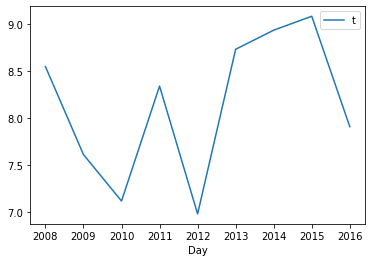

In [15]:
df_agg = df.groupby(df.Day.dt.year).aggregate('mean')
df_agg.plot()